# COOT on MNIST/USPS example

This notebook gives a simple example of the COOT problem between two well-known datasets: MNIST and USPS. 

We recall that for two datasets $\mathbf{X} \in \mathbb{R}^{n \times d}, \mathbf{X'} \in \mathbb{R}^{n' \times d'}$ the COOT problem aims at finding two optimal transport maps $\boldsymbol{\pi^{s}}$ and $\boldsymbol{\pi^{v}}$ between the samples and the features that solve:

\begin{equation}
\underset{\begin{smallmatrix}\boldsymbol{\pi^{s}} \in \Pi(\mathbf{w},\mathbf{w'}) \\ \boldsymbol{\pi^{v}} \in \Pi(\mathbf{v},\mathbf{v'}) \end{smallmatrix}} {\min} \sum_{ijkl} \left|X_{ik}-X_{jl}\right|^{p} \pi^{s}_{ij} \pi^{v}_{kl}
\end{equation}

where $\mathbf{w},\mathbf{w'}$ are histograms on the samples and $\mathbf{v},\mathbf{v'}$ are histogram on the features.

In our example the samples are images and the features are the pixels of the images. We will have $n,n'=300$ and $d=784, d'=256$

In [1]:
import numpy as np
from scipy import ndimage
import scipy as sp
import matplotlib.pylab as pl
import ot
import scipy.io
import sys
sys.path.append('../lib')
import cot

### Load the MNIST/USPS dataset

In [2]:
data=sp.io.loadmat('../data/mnist.mat')

Xtot1=data['xapp'].astype(np.float32)

Ytot1=data['yapp']
d1=Xtot1.shape[1]
Ytot1[Ytot1==10]=0


data=sp.io.loadmat('../data/usps.mat')

Xtot2=(data['xapp'].astype(np.float32)+1)/2

Ytot2=data['yapp']
Ytot2-=1
d2=Xtot2.shape[1]

np.random.seed(1976)

In [3]:
def get_data(x,y,nbperclass):
    
    xr=np.zeros((0,x.shape[1]))
    yr=np.zeros((0))
    
    for i in range(np.max(y).astype(int)+1):
        
        xi=x[y.ravel()==i,:]
        idx=np.random.permutation(xi.shape[0])
        
        xr=np.concatenate((xr,xi[idx[:nbperclass],:]),0)
        yr=np.concatenate((yr,i*np.ones(nbperclass)))
        
    return xr,yr
        
        
#%% We take 300 samples per class
nbperclass=300
xs,ys=get_data(Xtot1,Ytot1,nbperclass)
xs=xs/255

selmnist=xs.sum(0)>0

ntot=nbperclass*10

xs2=np.zeros((xs.shape[0],d1))
#xs2[:,sel1]=xs


xt,ys=get_data(Xtot2,Ytot2,nbperclass)


vs=xs.sum(axis=0) # set the weights on the features
vs/=vs.sum()
vt=xt.sum(axis=0)
vt/=vt.sum()
    


Delta: 0.0696261137590278  Loss: 0.21483985932109526
Delta: 0.07900223072518978  Loss: 0.15393610782239872
Delta: 0.06406771205595291  Loss: 0.14585143687690483
Delta: 0.06134537864163074  Loss: 0.1402697390537019
Delta: 0.07097068037248672  Loss: 0.12979680442177496
Delta: 0.06754879078678197  Loss: 0.11699911418068085
Delta: 0.0469977867665979  Loss: 0.11147428713988863
Delta: 0.03636927695133979  Loss: 0.11075080872174793
Delta: 0.03206302691955925  Loss: 0.11049981041521463
Delta: 0.02214141114057981  Loss: 0.11032859520784537
Delta: 0.014286386536789292  Loss: 0.11030535384555502
Delta: 0.017040746770065104  Loss: 0.11027786379858615
Delta: 0.018661724564790004  Loss: 0.11018723948030594
Delta: 0.014895101989017707  Loss: 0.11016216052650911
Delta: 0.011122385376065726  Loss: 0.11015531198621982
Delta: 0.008729032294532816  Loss: 0.11015016618933234
Delta: 0.007205475401932216  Loss: 0.1101489869431015
Delta: 0.004710144711397498  Loss: 0.11014863404195051
Delta: 0.0  Loss: 0.1101

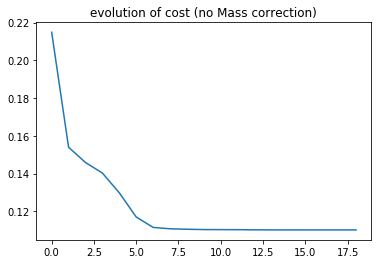

//anaconda/envs/py36/lib/python3.6/site-packages/ot/bregman.py:355: RuntimeWarning: divide by zero encountered in true_divide
  Kp = (1 / a).reshape(-1, 1) * K


Delta: 0.029202304637474884  Loss: 0.2203706085960477
Delta: 0.05145036178375604  Loss: 0.15865629681480886
Delta: 0.04871960296624857  Loss: 0.14050971200514337
Delta: 0.04913007336576564  Loss: 0.12708016611438686
Delta: 0.04622581469617641  Loss: 0.11655100411526458
Delta: 0.03078132025649821  Loss: 0.1131580847323932
Delta: 0.02192669552627037  Loss: 0.11250614456755503
Delta: 0.01631806400260271  Loss: 0.11228711953347964
Delta: 0.013520638867736488  Loss: 0.11216663044400153
Delta: 0.012743030151566895  Loss: 0.11209661595377834
Delta: 0.00946055443134664  Loss: 0.11207809931564175
Delta: 0.007729108551528804  Loss: 0.1120778211205194
Delta: 0.0077081902442778395  Loss: 0.11208310484858731
Delta: 0.00798251323611221  Loss: 0.11208300765387531
converged at iter  13
Elapsed time : 50.130587100982666 s


50.130587100982666

In [4]:
ot.tic()
Ts,Tv,_,log=cot.cot_numpy(xs,xt,v1=vs,v2=vt,niter=100,log=True) # solve COOT
ot.toc()

pl.figure(1,figsize=(6,4))
pl.plot(log['cost'])
pl.title('evolution of cost (no Mass correction)')
pl.show()

ot.tic()
Tsr,Tvr,_,logr=cot.cot_numpy(xs,xt,v1=vs,v2=vt,niter=100,log=True,algo2='sinkhorn',reg2=.5e-2) # solve COOT with sinkhorn
ot.toc()
   

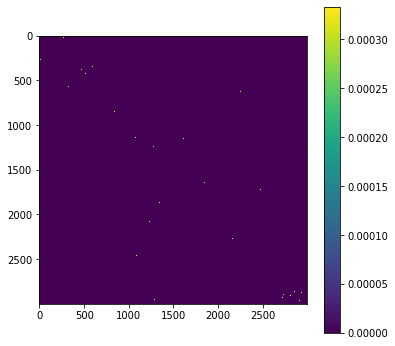

In [5]:
pl.figure(2,figsize=(6,6))
pl.imshow(Ts)
pl.colorbar()
pl.show()

In [6]:
Tv.shape,Ts.shape

((784, 256), (3000, 3000))

### Confusion matrix on the samples

We evaluate the COOT ability to find the good assignments of the images (samples), i.e. if it aligns well the samples classes between the two datasets based on the knowledge of $\boldsymbol{\pi^{s}}$

Find the good class in 67.73% 


Text(0.5, 0, 'Labels USPS')

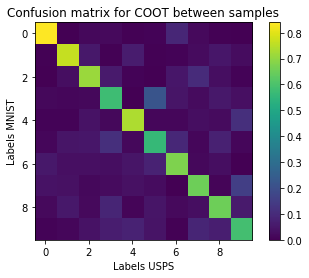

In [7]:
#%% confusion matrix

nbc=10

Cmat=np.zeros((nbc,nbc))
for i in range(ntot):
    #print(i)
    for j in range(ntot):
        if Ts[i,j]:
            Cmat[int(ys[i]),int(ys[j])]+=Ts[i,j]
            
print('Find the good class in {:.2f}% '.format(100*np.sum(np.diag(Cmat))))
        
#%%
pl.imshow(Cmat*10), pl.colorbar() 
pl.title('Confusion matrix for COOT between samples')
pl.ylabel('Labels MNIST')
pl.xlabel('Labels USPS')


### Vizualize the transport on the features

We propose to vizualize the optimal oupling on the features $\boldsymbol{\pi^{v}}$. In order to do that we color code each pixel of an image of size USPS and we transfer to an image of size MNIST.

//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


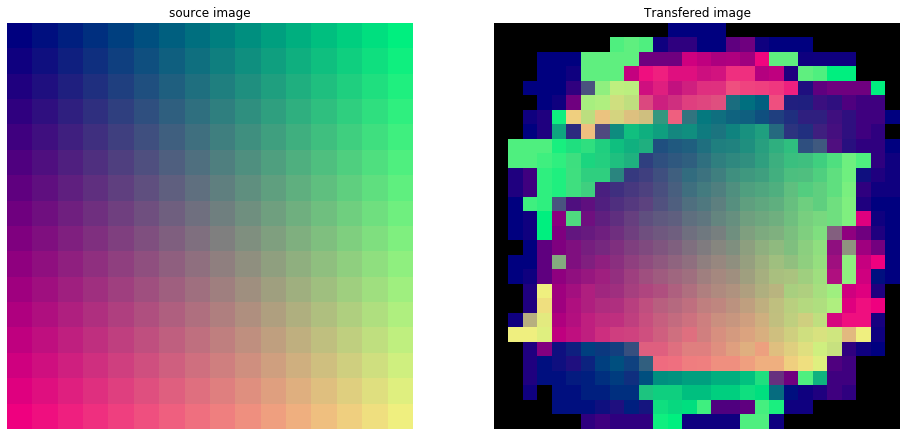

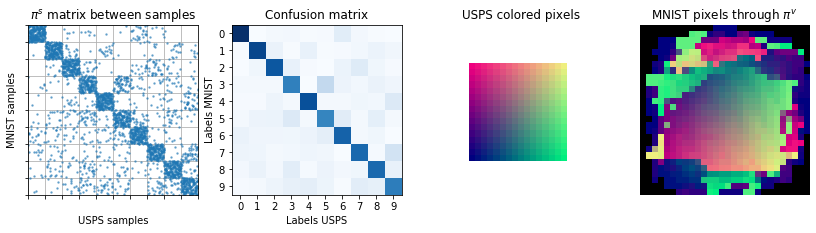

<Figure size 432x288 with 0 Axes>

In [8]:
#%%pix
dim_source=16
dim_target=28

image = np.zeros((dim_source,dim_source,3))

for i in range(dim_source):
    for j in range(dim_source):
        image[i,j,0]=i        
        image[i,j,1]=j
        image[i,j,2]=dim_source/2
image=image.astype(np.float32)/dim_source


diag=1./Tv.sum(axis=1)
diag[diag==np.inf]=0
image_target = np.dot(np.diag(diag),np.dot(image.reshape((dim_source*dim_source,3)).T,Tv.T).T)

image_target[~selmnist,:]=np.nan #we remove non informative features

image_target=image_target.reshape((dim_target,dim_target,3))


diagr=1./Tvr.sum(axis=1)
diagr[diagr==np.inf]=0
image_targetr = np.dot(np.diag(diagr),np.dot(image.reshape((dim_source*dim_source,3)).T,Tvr.T).T)

image_targetr[~selmnist,:]=np.nan

image_targetr=image_targetr.reshape((dim_target,dim_target,3))


pl.figure(3,figsize=(16,32))
pl.subplot(1,2,1)
pl.imshow(image)
pl.title('source image')
pl.axis('off')
pl.subplot(1,2,2)
pl.imshow(image_target)
pl.title('Transfered image')
pl.axis('off')
pl.show()

#%%
import scipy.sparse
sTs= scipy.sparse.coo_matrix(Ts)

row=sTs.row
col=sTs.col


pl.figure(10,figsize=(14,3.5))
pl.clf()
pl.subplot(1,4,1)
pl.plot(col,row,'.',markersize=3,alpha=0.5)
#pl.spy(Tv,markersize=3,marker='.',alpha=0.5)

pl.title('$\pi^s$ matrix between samples')
pl.xlabel('USPS samples')
pl.ylabel('MNIST samples')
pl.xticks([300*i for i in range(11)],[' ']*11)
pl.yticks([300*i for i in range(11)],[]*11)
pl.axis('scaled')
pl.xlim((0,ntot))
pl.ylim((ntot,0))
pl.grid()


pl.subplot(1,4,2)
pl.imshow(Cmat*10,cmap='Blues'), 
#pl.colorbar() 
pl.title('Confusion matrix')
pl.ylabel('Labels MNIST')
pl.xlabel('Labels USPS')
#pl.xticks(*pl.yticks())
pl.yticks([i for i in range(10)],[i for i in range(10)])
pl.ylim((nbc-.5,-.5))
pl.xticks([i for i in range(10)],[i for i in range(10)])
pl.xlim((-.5,nbc-.5,))
pl.subplot(1,4,3)

pl.imshow(image)
pl.title('USPS colored pixels')
pl.axis('off')
pl.xlim([-6,22])
pl.ylim([-6,22])


pl.subplot(1,4,4)
pl.imshow(image_target)
pl.title("MNIST pixels through $\pi^v$")
pl.axis('off')
pl.show()



pl.savefig('./mnist_usps.png')
pl.savefig('./mnist_usps.pdf',bbox_inches='tight')



We observe that the spatial structured is preserved (without supervision): the pixel are transported coherently on the center of the image

### Vizualize the images after transformation through the optimal couplings

We can also vizualize the images after transformation via the optimal couplings

Text(104, -7, 'USPS')

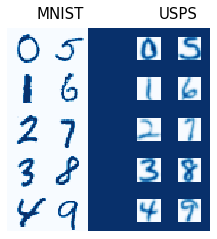

In [9]:
#%%

nbl,nbc=5,2

#idx_sel=np.random.randint(0,ntot,n_fig)
idx_sel=np.arange(0,ntot,nbperclass)+3


xts=xt[idx_sel,:]
xss=xs[idx_sel,:]

I=np.zeros((28*nbl,28*(nbc*2+1)))+1
for i in range(nbl):
    for j in range(nbc):
        I[i*28:(i+1)*28,j*28:(j+1)*28]=xss[i+j*nbl].reshape((28,28))
        
        I[i*28+6:(i)*28+22,j*28+28*(nbc+1)+6:j*28+28*(nbc+1)+22]=xts[i+j*nbl].reshape((16,16))
        
pl.figure(15)
pl.clf()
pl.imshow(I,cmap='Blues')
pl.axis('off')
pl.ylim([ I.shape[0],-10])
pl.text(20,-7,'MNIST',fontsize=15)
pl.text(20+28*(nbc+1),-7,'USPS',fontsize=15)



//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:177: RuntimeWarning: divide by zero encountered in true_divide


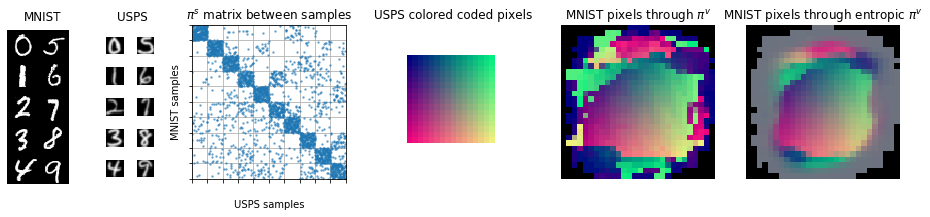

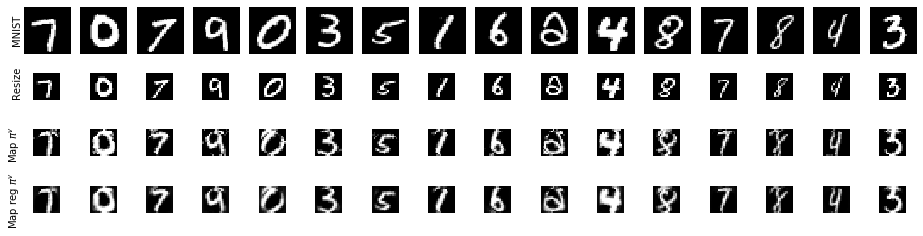

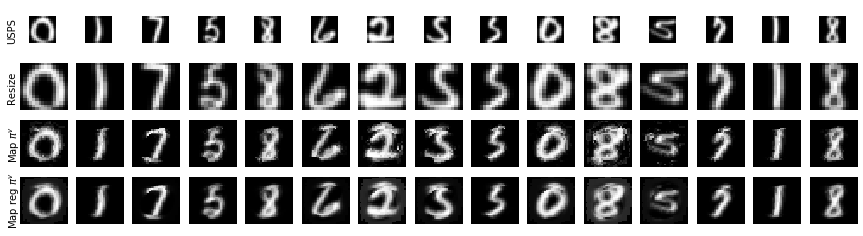

In [10]:
#%%
import scipy.sparse
sTv= scipy.sparse.coo_matrix(Ts)

row=sTs.row
col=sTs.col


pl.figure(11,figsize=(16,3.5))



pl.clf()

pl.subplot(1,5,1)
pl.imshow(I,cmap='gray')
pl.axis('off')
pl.ylim([ I.shape[0],-10])
pl.text(15,-9,'MNIST',fontsize=12)
pl.text(15+28*(nbc+1),-9,'USPS',fontsize=12)




pl.subplot(1,5,2)
pl.plot(col,row,'.',markersize=3,alpha=0.5)
#pl.spy(Tv,markersize=3,marker='.',alpha=0.5)

pl.title('$\pi^s$ matrix between samples')
pl.xlabel('USPS samples')
pl.ylabel('MNIST samples')
pl.xticks([300*i for i in range(11)],[' ']*11)
pl.yticks([300*i for i in range(11)],[]*11)
pl.axis('scaled')
pl.xlim((0,ntot))
pl.ylim((ntot,0))
pl.grid()



pl.subplot(1,5,3)

pl.imshow(image)
pl.title('USPS colored coded pixels')
pl.axis('off')
pl.xlim([-6,22])
pl.ylim([22,-6])


pl.subplot(1,5,4)
pl.imshow(image_target)
pl.title("MNIST pixels through $\pi^v$")
pl.axis('off')
#pl.show()

pl.subplot(1,5,5)
pl.imshow(image_targetr)
pl.title("MNIST pixels through entropic $\pi^v$")
pl.axis('off')
#pl.show()

pl.savefig('./mnist_usps.png')
pl.savefig('./mnist_usps.pdf',bbox_inches='tight')

    
#%% 
import random
import PIL as pil

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

def predict_barycenter(data,T):
    diag=1./T.sum(axis=1)
    diag[diag==np.inf]=0
    return np.dot(T,data.T).T.dot(np.diag(diag))

def predict_barycenter_reverse(data,T):
    diag=1./T.sum(axis=1)
    diag[diag==np.inf]=0
    return np.dot(T,data).T.dot(np.diag(diag)).T

random.seed(1985)
np.random.seed(1976)

n_fig=16

idx_sel=np.random.randint(0,ntot,n_fig)

xsel=xs[idx_sel,:]
xpred=np.zeros((n_fig,d2))
xpredr=np.zeros((n_fig,d2))
for i in range(n_fig):
    xpred[i,:]=predict_barycenter(xsel[i,:],Tv.T)
    xpredr[i,:]=predict_barycenter(xsel[i,:],Tvr.T)

cmap_g='gray'
pl.figure(figsize=(n_fig,4))

for i in range(n_fig):
    
    ax= pl.subplot(4,n_fig,i+1)
    
    pl.imshow(xsel[i,:].reshape((28,28)),cmap=cmap_g)
    pl.axis('off')
    pl.xticks(())
    pl.yticks(())
    #pl.xlim([-6,22])
    #pl.ylim([22,-6])
    if i==0: 
        ax.text(left-.3, 0.5*(bottom+top), 'MNIST',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)
        #pl.ylabel('MNIST')
    
    pl.subplot(4,n_fig,i+1+n_fig)
    img = pil.Image.fromarray((xsel[i,:]* 255 / np.max(xsel[i,:])).reshape((28,28)) .astype('float32'))
    img = img.resize((16,16))
    pl.imshow(img,cmap=cmap_g)
    pl.axis('off')
    pl.xticks(())
    pl.yticks(())
    pl.xlim([-6,22])
    pl.ylim([22,-6])
    if i==0: 
        ax.text(left-.3, 0.5*(bottom+top) - 1.1, 'Resize',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)
    
    ax = pl.subplot(4,n_fig,i+1+2*n_fig)
    ax.imshow(xpred[i,:].reshape((16,16)),cmap=cmap_g)
    pl.axis('off')
    pl.xticks(())
    pl.yticks(())
    pl.xlim([-6,22])
    pl.ylim([22,-6])  
    if i==0: 
        ax.text(left-.3, 0.5*(bottom+top), 'Map $\pi^v$',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)

    ax= pl.subplot(4,n_fig,i+1+3*n_fig)
    pl.imshow(xpredr[i,:].reshape((16,16)),cmap=cmap_g)
    pl.axis('off')
    pl.xticks(())
    pl.yticks(())
    pl.xlim([-6,22])
    pl.ylim([22,-6])
    if i==0: 
        ax.text(left-.3, 0.5*(bottom+top), 'Map reg $\pi^v$',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)
        #pl.ylabel('Map reg $\pi^v$')

pl.savefig('./transp_piv_mnist.png')
pl.savefig('./transp_piv_mnist.pdf',bbox_inches='tight')





#%% 
import random
import PIL as pil
def predict_barycenter(data,T):
    diag=1./T.sum(axis=1)
    diag[diag==np.inf]=0
    return np.dot(T,data.T).T.dot(np.diag(diag))
def predict_barycenter_reverse(data,T):
    diag=1./T.sum(axis=1)
    diag[diag==np.inf]=0
    return np.dot(T,data).T.dot(np.diag(diag)).T
random.seed(1985)
np.random.seed(1986)
n_fig=15
idx_sel=np.random.randint(0,ntot,n_fig)
xsel=xt[idx_sel,:]
xpred=np.zeros((n_fig,d1))
xpredr=np.zeros((n_fig,d1))
for i in range(n_fig):
    xpred[i,:]=predict_barycenter(xsel[i,:],Tv)
    xpredr[i,:]=predict_barycenter(xsel[i,:],Tvr)
pl.figure(figsize=(n_fig,4))
cmap_g='gray'
for i in range(n_fig):
    
    ax=pl.subplot(4,n_fig,i+1)
    
    pl.imshow(xsel[i,:].reshape((16,16)),cmap=cmap_g)
    pl.axis('off')
    pl.xticks(())
    pl.yticks(())
    pl.xlim([-6,22])
    pl.ylim([22,-6])
    if i==0: 
        ax.text(left-.3, 0.5*(bottom+top), 'USPS',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)
        
    ax=pl.subplot(4,n_fig,i+1+n_fig)
    img = pil.Image.fromarray((xsel[i,:]* 255 / np.max(xsel[i,:])).reshape((16,16)).astype('float32'))
    img = img.resize((28,28))
    pl.imshow(np.array(img),cmap=cmap_g)
    pl.axis('off')
    pl.xticks(())
    pl.yticks(())
    if i==0: 
        ax.text(left-.3, 0.5*(bottom+top) , 'Resize',
        horizontalalignment='right', verticalalignment='center',rotation='vertical',
        transform=ax.transAxes)    
    ax=pl.subplot(4,n_fig,i+1+2*n_fig)
    pl.imshow(xpred[i,:].reshape((28,28)),cmap=cmap_g)
    pl.axis('off')
    pl.xticks(())
    pl.yticks(())
    if i==0: 
        ax.text(left-.2, 0.5*(bottom+top) , 'Map $\pi^v$',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)
        
    ax=pl.subplot(4,n_fig,i+1+3*n_fig)
    pl.imshow(xpredr[i,:].reshape((28,28)),cmap=cmap_g)
    pl.axis('off')
    pl.xticks(())
    pl.yticks(())
    if i==0: 
        ax.text(left-.2, 0.5*(bottom+top) , 'Map reg $\pi^v$',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)
        pl.ylabel('Map reg $\pi^v$')
        
pl.savefig('./transp_piv_usps.png')
pl.savefig('./transp_piv_usps.pdf',bbox_inches='tight')